In [1]:
# Get raw data
with open('input/11.txt', 'r') as f:
    rawinput = f.read().strip()

In [ ]:
from intcode import Program  # From Day 9

In [3]:
# Part 1
class Robot(Program):
    def __init__(self, instr, start_on_white=False, verbose=False):
        super().__init__(instr, [int(start_on_white)], verbose)
        self.pos = (0,0)
        self.panels = {self.pos: int(start_on_white)}
        self.facing = (-1,0)
        
    def do_output(self, addr, val):
        if self.verbose:  print(f"Ptr={self.ptr:2d}:  OUTPUT value {val[0]}")
        if self.output:
            self.action(self.output.pop(0), val[0])
        else:
            self.output += [val[0]]
        self.ptr += 2
        
    def action(self, color, turn):
        self.panels[self.pos] = color
        if self.verbose:  print(f"PAINTING {self.pos} {['black','white'][color]}")
        self.facing = tuple([[0,([(z:=int(self.facing[1]<self.facing[0])),1-z][turn]*2)-1][j==0] 
                             for j in self.facing])
        self.pos = tuple([sum(i) for i in zip(self.pos, self.facing)])
        self.input_val += [self.panels.get(self.pos, 0)]
        if self.verbose:  print(f"TURNING {['left','right'][turn]}, moving to {self.pos}")

robot = Robot([int(i) for i in rawinput.split(',')])
robot.do_exec()
len(robot.panels)

2336

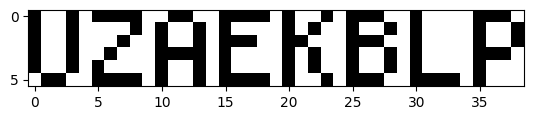

In [4]:
# Part 2
import numpy as np
import matplotlib.pyplot as plt

robot = Robot([int(i) for i in rawinput.split(',')], start_on_white=True)
robot.do_exec()

black = (z:=np.array([[r,c] for [r,c],v in robot.panels.items() if v])) - np.min(z, axis=0, keepdims=True)
reg = np.zeros(np.max(black, axis=0)+1, dtype=int)
reg[black[:,0],black[:,1]] = 1

plt.imshow(reg, cmap='gray_r')